In [1]:
import datetime
import math
import pickle
import matplotlib.pyplot as plt
import numpy as np
import quandl
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
style.use('ggplot')

df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [3]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # Replace missing data points

forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(["label"], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

classifier = LinearRegression(n_jobs=10)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
forecast_set = classifier.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1077.02551234 1091.55651243 1105.47911272 1100.11086204 1093.65835645
 1091.02101969 1089.36842213 1086.32788015 1080.24518119 1075.8977334
 1073.51849678 1093.1144847  1111.53488248 1115.98243392 1130.82999886
 1134.85301556 1133.4621064  1130.95908641 1132.73209664 1151.20194688
 1150.53895167 1160.29620305 1156.9235092  1164.66519261 1185.08799781
 1197.38003749 1191.81919815 1203.59825832 1209.09951602 1207.37052799
 1198.11931258 1203.55731636 1202.27543665 1137.94287238 1085.40311167] 0.9759853197788173 35


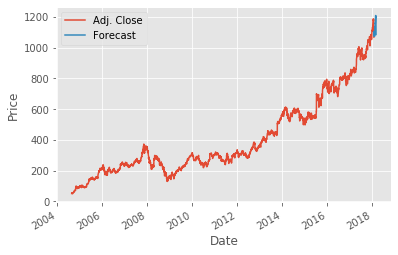

In [4]:
df['Forecast'] = np.nan

last_data = df.iloc[-1].name
last_unix = last_data.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()